In [1]:
import torch

数据操作

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
X = x.reshape(3, 4)
X1 = x.reshape(-1, 4)
X2 = x.reshape(3, -1)
X, X1, X2

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn(3, 4)

tensor([[ 0.9140, -1.1336,  0.4489,  0.3842],
        [-0.2819,  0.0574, -0.1602,  1.0782],
        [ 1.1746,  0.1632,  0.2239, -0.3748]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

常用运算符

In [10]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [11]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [12]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [13]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [14]:
X.sum()

tensor(66.)

广播机制

In [15]:
a = torch.arange(3).reshape((3, 1, 1))
b = torch.arange(6).reshape((1, 2, 3))
a, b

(tensor([[[0]],
 
         [[1]],
 
         [[2]]]),
 tensor([[[0, 1, 2],
          [3, 4, 5]]]))

In [16]:
a + b

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[2, 3, 4],
         [5, 6, 7]]])

索引和切片

In [17]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

python中数据值的传递是引用
赋值运算符可以改变变量的引用

对于不可变对象（如整数、浮点数、字符串、元组），y = x + y 和 y += x 在功能上是等价的，但它们在内部的处理上有所不同：


y = x + y：这会创建一个新的对象来存储x和y的和，并将y的引用指向这个新对象。因此，y的内存地址会改变。

y += x：由于Python中的+=操作符对于不可变类型进行了优化，实际上会执行类似y = type(y)(y + x)的操作（但更高效），同样会创建一个新的对象，并将y的引用更新为这个新对象。因此，y的内存地址也会改变。不过，值得注意的是，在Python的某些实现（特别是CPython）中，对于整数这样的小对象，可能存在一个“小整数池”优化，但这不影响y的内存地址变化的基本事实。


可变对象（如列表、字典、集合）

y = x + y（假设x和y都是列表）：这会创建一个新的列表来存储x和y的拼接结果，并将y的引用指向这个新列表。因此，y的内存地址会改变。

y += x：对于可变对象，+=操作符会直接在原对象上进行修改（而不是创建一个新对象），因此y的内存地址不会改变。

+调用的是add方法，add方法会将相加之后的值赋值给新变量。
+=调用的是iadd方法，iadd方法会进行原地操作。不可变类型的变量的+=不进行原地操作的原因是不可变类型是没有iadd方法的，因此会重载add方法。

In [18]:
a = 10
b = a
print(id(a), id(b))

2881570695760 2881570695760


In [19]:
a = 10
b = 20
print(id(a), id(b))
a += b
print(id(a))
b += a
print(id(b))

2881570695760 2881570696080
2881570696400
2881570697040


In [20]:
before = id(Y)
print("id(Y1):", id(Y))
Y = Y + X
print("id(Y2):", id(Y))
id(Y) == before

id(Y1): 2880274782704
id(Y2): 2880274809216


False

In [21]:
before = id(Y)
print("id(Y1):", id(Y))
Y += X
print("id(Y2):", id(Y))
id(Y) == before

id(Y1): 2880274809216
id(Y2): 2880274809216


True

In [22]:
Z = torch.zeros_like(Y)
print("id(Z):", id(Z))
Z[:] = X + Y
print("id(Z):", id(Z))

id(Z): 2880274809056
id(Z): 2880274809056


In [23]:
before = id(X)
X += Y
id(X) == before

True

转换为其他Python对象

In [24]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)
B = 0
A, B

(array([[ 2.,  4., 10., 12.],
        [13., 17., 21., 25.],
        [28., 30., 32., 34.]], dtype=float32),
 0)

torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

torch张量和numpy数组的地址不一样，但共享内存更新torch张量会改变numpy数组。而要把一个numpy转为tensor
a = numpy.ones(5)，
方法一 b = torch.tensor(a) 相当于创建一个新tensor，不会共享内存
方法二 b = torch.from_numpy(a) 相当于从获取numpy中的值，会共享内存

故.numpy和from_numpy会共享内存，torch.tensor不会共享内存

In [25]:
# 创建一个NumPy数组
import numpy as np

numpy_array = np.arange(5)
print("Original NumPy Array:", numpy_array)

# 将NumPy数组转换为PyTorch张量
torch_tensor = torch.from_numpy(numpy_array)
print("Converted PyTorch Tensor:", torch_tensor)
print(numpy_array)

Original NumPy Array: [0 1 2 3 4]
Converted PyTorch Tensor: tensor([0, 1, 2, 3, 4], dtype=torch.int32)
[0 1 2 3 4]


In [26]:
# 从张量转换得到的NumPy数组
print(numpy_array)
numpy_array = torch_tensor.numpy()

# 对PyTorch张量进行就地操作
torch_tensor.add_(1)  # 每个元素加一
print("After in-place operation on PyTorch Tensor:", torch_tensor)
print("NumPy Array after PyTorch Tensor in-place operation:", numpy_array)

[0 1 2 3 4]
After in-place operation on PyTorch Tensor: tensor([1, 2, 3, 4, 5], dtype=torch.int32)
NumPy Array after PyTorch Tensor in-place operation: [1 2 3 4 5]


数据预处理

读取数据集

In [27]:
import os

os.makedirs(os.path.join("..", "data"), exist_ok=True)
data_file = os.path.join("..", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write("NumRooms,Alley,Price\n")  # 列名
    f.write("NA,Pave,127500\n")  # 每行表示一个数据样本
    f.write("2,NA,106000\n")
    f.write("4,NA,178100\n")
    f.write("NA,NA,140000\n")

In [28]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


处理缺失值

In [29]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]  # [ : , : ]前面是行，后面是列
# inputs = inputs.fillna(inputs.mean()) # 第2列识别为str，无法进行数值平均运算，我们在括号加入限制条件，仅在数据类型为数值的列进行平均值插值。
# fillna函数是pandas库中用于处理缺失值的一个方法。它可以用指定的值、方法或字典来填充数据集中的空值。
inputs = inputs.fillna(inputs.mean(numeric_only=True))
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [30]:
# get_dummies() 利用pandas实现one hot encode的方式
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [31]:
import torch

# to_numpy()方法将Pandas DataFrame或Series转换为NumPy数组
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

练习

In [32]:
import os

data_file1 = os.path.join("..", "data", "house_tiny1.csv")
with open(data_file1, "w") as f:
    f.write("NumRooms,Alley,size,Price\n")  # 列名
    f.write("NA,Pave,NA,127500\n")  # 每行表示一个数据样本
    f.write("2,NA,NA,106000\n")
    f.write("4,NA,NA,178100\n")
    f.write("NA,NA,NA,140000\n")

In [33]:
data1 = pd.read_csv(data_file1)
data1

,NumRooms,Alley,size,Price
0,NaN,Pave,NaN,127500
1,2.0,NaN,NaN,106000
2,4.0,NaN,NaN,178100
3,NaN,NaN,NaN,140000


In [34]:
def drop_mostNA(data):
    """
    isna(): 判断是否为缺失值(NaN)
    sum(): 沿着0轴求和
    idxmax(): 找出这个Series中最大值(即缺失值最多的列)的索引
    """
    na_count = data.isna().sum(axis=0).idxmax()
    # print(na_count,type(na_count)) # dtype: int64 <class 'pandas.core.series.Series'>
    """
    pandas包含两种数据类型:series和dataframe。
    series是一种一维数据结构,每一个元素都带有一个索引,与一维数组的含义相似,其中索引可以为数字或字符串。
    index     输出‘索引’
    index[0]  在方法之后加入方括号指定某一‘索引’
    keys()    和 index 作用相同，查看‘索引’
    keys()[0] 在方法之后加入方括号指定某一‘索引’
    values    查看 Series 值
    size      查看 Serise 中元素的数量 

    """
    return na_count


data1.drop(columns=drop_mostNA(data1))

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [35]:
inputs1 = torch.tensor(
    pd.get_dummies(data1.iloc[:, :], dummy_na=True).to_numpy(dtype=float)
)
target1 = torch.tensor(data1.iloc[:, -1])
inputs1, target1

(tensor([[       nan,        nan, 1.2750e+05, 1.0000e+00, 0.0000e+00],
         [2.0000e+00,        nan, 1.0600e+05, 0.0000e+00, 1.0000e+00],
         [4.0000e+00,        nan, 1.7810e+05, 0.0000e+00, 1.0000e+00],
         [       nan,        nan, 1.4000e+05, 0.0000e+00, 1.0000e+00]],
        dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

线性代数

标量

In [36]:
# 标量由只有一个元素的张量表示
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

向量

In [37]:
x = torch.arange(4)
x, x[3]

(tensor([0, 1, 2, 3]), tensor(3))

长度、维度和形状。
数组、向量与张量“维度”的理解。
向量的维度：向量的维度是指该向量所具有的坐标数或分量数。例如，一个二维向量拥有两个坐标，通常表示为 (x, y)，其中 x 和 y 是实数。一个三维向量则有三个坐标，通常表示为 (x, y, z)。向量的维度可以是任意正整数，可以表示在 n 维空间中的位置或方向。
张量的维度：张量的维度用来表示张量具有的轴数。

In [38]:
len(x), x.shape

(4, torch.Size([4]))

矩阵

In [39]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [40]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [41]:
# 对称矩阵 B=BT
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B, B.T, B == B.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

张量


In [42]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [43]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为Hadamard积（Hadamard product）积，（数学符号⊙），同阶矩阵对应元素相乘，也就是点乘

In [44]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

torch中，使用`@`来进行张量的叉乘运算，也是常见的矩阵乘法运算

In [45]:
C = torch.arange(25, dtype=torch.float32).reshape(5, 5)
D = C.clone()
C, C @ D

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.],
         [20., 21., 22., 23., 24.]]),
 tensor([[ 150.,  160.,  170.,  180.,  190.],
         [ 400.,  435.,  470.,  505.,  540.],
         [ 650.,  710.,  770.,  830.,  890.],
         [ 900.,  985., 1070., 1155., 1240.],
         [1150., 1260., 1370., 1480., 1590.]]))

In [46]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

降维

In [47]:
# 对张量元素进行求和
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [48]:
# 可以计算任意形状张量的元素和
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。

 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [49]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

指定axis=1将通过汇总所有列的元素降维（轴1）。因此，输入轴1的维数在输出形状中消失。

In [50]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [51]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

In [52]:
# 平均值
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [53]:
# 同样可以指定轴降低张量的维度
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

非降维求和，参数`keepdims=True`

In [54]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [55]:
# 由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [56]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [57]:
# 当前元素与前面所有元素的和相加，结果存储在对应位置
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [58]:
A.cumsum(axis=1)

tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])

向量点积
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mi mathvariant="normal">&#x22A4;</mi>
  </msup>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">y</mi>
  </mrow>
  <mo>=</mo>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>d</mi>
    </mrow>
  </munderover>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
</math>
相同位置的按元素乘积的和

In [59]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [60]:
# 或者通过执行按元素乘法，然后进行求和来表示两个向量的点积
torch.sum(x * y)

tensor(6.)

在代码中使用张量表示矩阵-向量积，我们使用mv函数。

In [61]:
A, x

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]))

In [62]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

矩阵-矩阵乘法可以简单地称为矩阵乘法，不应与“Hadamard积”混淆

以将矩阵-矩阵乘法<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">AB</mi>
  </mrow>
</math>
看作简单地执行<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>m</mi>
</math>
次矩阵-向量积，并将结果拼接在一起，形成一个
矩阵。

矩阵-矩阵乘法可以简单地称为矩阵乘法，不应与“Hadamard积”混淆。

In [63]:
B = torch.ones(4, 3)
B, torch.mm(A, B)

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

范数

In [64]:
# L2范数，向量元素平方和的平方根
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [65]:
# L1范数，向量元素的绝对值之和
torch.abs(u).sum()

tensor(7.)

与L2范数相比，L1范数受异常值的影响较小

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>L</mi>
    <mi>p</mi>
  </msub>
</math>范数<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">x</mi>
  </mrow>
  <msub>
    <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
    <mi>p</mi>
  </msub>
  <mo>=</mo>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <munderover>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mi>n</mi>
      </munderover>
      <msup>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">|</mo>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
          <mo data-mjx-texclass="CLOSE">|</mo>
        </mrow>
        <mi>p</mi>
      </msup>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
      <mrow data-mjx-texclass="ORD">
        <mo>/</mo>
      </mrow>
      <mi>p</mi>
    </mrow>
  </msup>
  <mo>.</mo>
</math>

线性代数练习

In [66]:
(A.T).T == A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

`/`：矩阵除法通常指的是矩阵的元素逐个相除，即逐元素相除

在线性代数中，除法通常用乘以一个逆矩阵来计算

In [67]:
a1=torch.arange(6).reshape(2,3)
b1=torch.ones(6).reshape(2,3)
a1/b1

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [68]:
A=torch.arange(6).reshape(2,3)

In [69]:
A, A.sum(axis=1), A.sum(axis=1, keepdim=True), A.sum(axis=0)

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([ 3, 12]),
 tensor([[ 3],
         [12]]),
 tensor([3, 5, 7]))

由于pytorch的广播机制，对某一轴进行求和成向量，依然除法可以进行运算

In [70]:
A.shape, A.sum(axis=1).shape, A.sum(axis=1, keepdim=True).shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([2]), torch.Size([2, 1]), torch.Size([3]))

但某些轴进行求和运算时，张量的形状会发生变化，例如上述的axis=1轴，

广播机制的规则

1.对齐维度：
如果两个张量的维度不同，在维度较少的张量前面添加长度为 1 的维度，使两个张量具有相同的维度。

2.从后往前比较维度：
从最后一个维度开始，逐个维度进行比较：

如果两个张量在某个维度上的长度相同，或者其中一个张量在该维度上的长度为 1，那么这两个张量在该维度上是兼容的，可以进行广播。

如果两个张量在某个维度上的长度不同且都不为 1，那么它们在该维度上不兼容，无法进行广播。

3.扩展维度：
广播时，将长度为 1 的维度扩展为与另一个张量在该维度上的长度相同。

抓住“右对齐”来理解广播机制是非常有好处的，判断任意tensor间是否可以广播，只需按照以下步骤就绝对不会出错了：

将两操作对象的shape做右对齐
空缺的位置假想为1
比较同一位置处各操作对象的维数，若相同或有一个为1，则可以广播，否则无法广播
例如两个tensor的shape分别为(8, 1, 6, 5)和 (7, 1, 5)，那么是否可以广播呢？
做右对齐, 空缺的位置假想为1:
8, 1, 6, 5
1, 7, 1, 5
按照以上规则得出是可以广播的，操作结果的shape应为(8, 7, 6, 5)

In [71]:
A/A.sum(axis=0)

tensor([[0.0000, 0.2000, 0.2857],
        [1.0000, 0.8000, 0.7143]])

In [72]:
# A/A.sum(axis=1)  #   报错

In [73]:
a=torch.tensor([[0],[10],[20],[30]])
b=torch.tensor([1,2,3,4])
a+b

tensor([[ 1,  2,  3,  4],
        [11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34]])

In [74]:
A/A.sum(axis=1,keepdim=True)

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [75]:
A = torch.arange(25, dtype=torch.float32).reshape(5, 5)
B = torch.rand(25, dtype=torch.float32).reshape(5, 5)
A, B, A.T + B.T == (A + B).T

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.],
         [20., 21., 22., 23., 24.]]),
 tensor([[0.7461, 0.9046, 0.5723, 0.2161, 0.2106],
         [0.2138, 0.5170, 0.6283, 0.0652, 0.1410],
         [0.2350, 0.5170, 0.0518, 0.4912, 0.3996],
         [0.0340, 0.3838, 0.4577, 0.0576, 0.5655],
         [0.0077, 0.0359, 0.7996, 0.5768, 0.1802]]),
 tensor([[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]))

In [76]:
(A + A.T) == (A+A.T).T

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [77]:
X.shape

torch.Size([2, 3, 4])

In [78]:
len(X),len(X[1][0])

(2, 4)

微积分

In [79]:
# 是一个在Jupyter Notebook或JupyterLab等环境中使用的IPython魔法命令（magic command）。
# 它的作用是让matplotlib生成的图表直接嵌入到Notebook的页面中，而不是在一个新的窗口中打开。
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [80]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [81]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

1
1


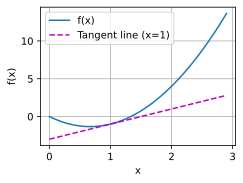

In [89]:
# @save
import pdb


def plot(
    X,
    Y=None,
    xlabel=None,
    ylabel=None,
    legend=None,
    xlim=None,
    ylim=None,
    xscale="linear",
    yscale="linear",
    fmts=("-", "m--", "g-.", "r:"),
    figsize=(3.5, 2.5),
    axes=None,
):
    """绘制数据点"""
    if legend is None:
        legend = []

    # gca是get current axis的首字母的缩写，获取当前轴对象
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True

    # 检查输入的X是否具有作为一个轴（维度）的数据结构。
    # hastter检查对象是否包含指定的属性
    #  X.ndim == 1表示是一个一维数组
    # isinstance检查对象是否为一个已知的数据类型
    # 在 Python 中，拥有 __len__ 方法的对象通常是可以迭代的，并且可能包含多个元素（例如列表、元组、字符串等），not表示为标量
    def has_one_axis(X):
        return (
            hasattr(X, "ndim")
            and X.ndim == 1
            or isinstance(X, list)
            and not hasattr(X[0], "__len__")
        )

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()  #    清屏
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
            print("1")
        else:
            axes.plot(y, fmt)
            print("2")
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


if __name__ == "__main__":
    x = np.arange(0, 3, 0.1)
    plot(x, [f(x), 2 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])

In [82]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [83]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

1
1


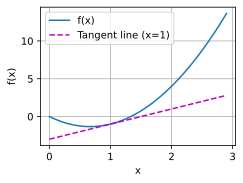

In [84]:
# @save
import pdb


def plot(
    X,
    Y=None,
    xlabel=None,
    ylabel=None,
    legend=None,
    xlim=None,
    ylim=None,
    xscale="linear",
    yscale="linear",
    fmts=("-", "m--", "g-.", "r:"),
    figsize=(3.5, 2.5),
    axes=None,
):
    """绘制数据点"""
    if legend is None:
        legend = []

    # gca是get current axis的首字母的缩写，获取当前轴对象
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True

    # 检查输入的X是否具有作为一个轴（维度）的数据结构。
    # hastter检查对象是否包含指定的属性
    #  X.ndim == 1表示是一个一维数组
    # isinstance检查对象是否为一个已知的数据类型
    # 在 Python 中，拥有 __len__ 方法的对象通常是可以迭代的，并且可能包含多个元素（例如列表、元组、字符串等），not表示为标量
    def has_one_axis(X):
        return (
            hasattr(X, "ndim")
            and X.ndim == 1
            or isinstance(X, list)
            and not hasattr(X[0], "__len__")
        )

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()  #    清屏
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
            print("1")
        else:
            axes.plot(y, fmt)
            print("2")
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


if __name__ == "__main__":
    x = np.arange(0, 3, 0.1)
    plot(x, [f(x), 2 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])

In [ ]:
#@save
import pdb


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    # gca是get current axis的首字母的缩写，获取当前轴对象
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True

    # 检查输入的X是否具有作为一个轴（维度）的数据结构。
    # hastter检查对象是否包含指定的属性
    #  X.ndim == 1表示是一个一维数组
    # isinstance检查对象是否为一个已知的数据类型
    # 在 Python 中，拥有 __len__ 方法的对象通常是可以迭代的，并且可能包含多个元素（例如列表、元组、字符串等），not表示为标量
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla() #    清屏
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
            print("1")
        else:
            axes.plot(y, fmt)
            print("2")
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
if __name__=="__main__":
    x = np.arange(0, 3, 0.1)
    plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

1
1


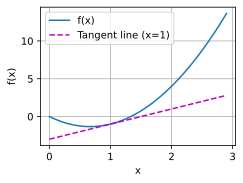

In [85]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

补充：plt.gca()的作用

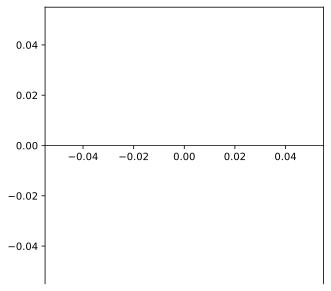

In [86]:
import matplotlib.pyplot as plt

# 这里建立的画布大小是5*5的，并不是坐标轴范围，使用“十字按钮”拖动你就懂了！
plt.figure(figsize = (5,5))
plt.plot()  # 画个只有坐标系的图（因为没有传参数，所以显示空白）

ax = plt.gca()

# 获取你想要挪动的坐标轴，这里只有顶部、底部、左、右四个方向参数
ax.xaxis.set_ticks_position('bottom')  #  要挪动底部的X轴，所以先目光锁定底部！

# 在这里，position位置参数有三种，这里用到了“按Y轴刻度位置挪动”
# 'data'表示按数值挪动，其后数字代表挪动到Y轴的刻度值
ax.spines['bottom'].set_position(('data',0))
plt.show()


In [87]:
a=0
b=0
if a:
    print("1")
elif b:
    print("2")

微积分练习

1
1


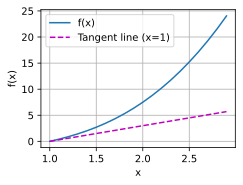

In [88]:
x = np.arange(1, 3, 0.1)
plot(x, [x**3 - 1 / x, 3 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])